In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")

In [3]:
X = df.drop(columns=['Buys','Sr'])
X

,Age,Salary,Married
0,young,low,no
1,adult,high,yes
2,old,medium,yes
3,old,medium,no
4,young,low,no
5,adult,high,yes
6,adult,medium,no
7,old,high,yes


In [4]:
y = df['Buys']
y

0    yes
1     no
2    yes
3    yes
4     no
5     no
6    yes
7     no
Name: Buys, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [6]:
x = X.apply(le.fit_transform)
x

,Age,Salary,Married
0,2,1,0
1,0,0,1
2,1,2,1
3,1,2,0
4,2,1,0
5,0,0,1
6,0,2,0
7,1,0,1


In [7]:
x_train , x_test, y_train , y_test = train_test_split(x ,y ,test_size = 0.2)

In [8]:
dt = DecisionTreeClassifier()

In [9]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
y_pred = dt.predict(x_test)

In [11]:
print(y_pred)

['no' 'yes']


In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)

1.0

In [13]:
print(classification_report(y_pred,y_test))
print("\n")
print(confusion_matrix(y_pred,y_test))

             precision    recall  f1-score   support

         no       1.00      1.00      1.00         1
        yes       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         2



[[1 0]
 [0 1]]


In [14]:
from sklearn import tree
import pydotplus
from IPython.display import Image

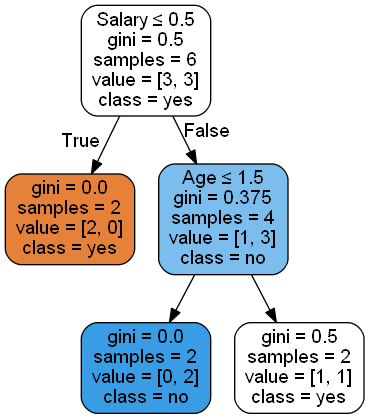

In [15]:
dot_data = tree.export_graphviz(dt,out_file=None,feature_names=X.columns,class_names = ['yes','no'],filled=True,rounded=True,special_characters=True)

dtree = pydotplus.graph_from_dot_data(dot_data)

Image(dtree.create_png())
